CS524: Introduction to Optimization Lecture 27
======================================

## Michael Ferris<br> Computer Sciences Department <br> University of Wisconsin-Madison

## November 4, 2024
--------------

In [2]:
import gamspy as gp
import gamspy.math as gpm
from gamspy import Sum, Card

import sys
import numpy as np
import pandas as pd

In [ ]:
# Kalvelagen, E, Model Building with GAMS. forthcoming

cont = gp.Container(load_from="qp6.gdx")

# Sets
days, stocks = cont.getSymbols(["days", "stocks"])

# Parameters
returns, val = cont.getSymbols(["return", "val"])

# Set
d = cont.addSet(name="d", domain=[days], description="selected days")
s = cont.addSet(name="s", domain=[stocks], description="selected stocks")
t = cont.addAlias("t",s)

# select subset of stocks and periods
d[days] = (days.ord > 1) & (days.ord < 101)
s[stocks] = stocks.ord < 171

# Parameter
mean = cont.addParameter(
    name="mean", domain=stocks, description="mean of daily return")
dev = cont.addParameter(
    name="dev", domain=[stocks, days], description="deviations")
covar = cont.addParameter("covar", domain=[stocks, stocks])
totmean = cont.addParameter(name="totmean", description="total mean return")

mean[s] = Sum(d, returns[s, d]) / Card(d)
dev[s, d] = returns[s, d] - mean[s]
# calculate covariance
covar[s,t] = Sum(d, dev[s,d]*dev[t,d])/(Card(d) - 1)
totmean[...] = Sum(s, mean[s]) / (Card(s))

# Variable
x = cont.addVariable("x",
    type="positive",
    domain=stocks,
    description="investments")

# Equation
budget = cont.addEquation(name="budget")
budget[:] = Sum(s, x[s]) == 1.0

retcon = cont.addEquation(name="retcon", description="returns constraint")
retcon[:] = Sum(s, mean[s] * x[s]) >= totmean * 1.25

qp1 = cont.addModel("qp1",
    equations=cont.getEquations(),
    problem=gp.Problem.QCP,
    sense=gp.Sense.MIN,
    objective=Sum([s,t], x[s]*covar[s,t]*x[t]))

qp1.solve()

,GAB,GAP,GDW,GE,GEN,GENZ,GGUY,GIS,GM,GME,...,STRM,SUN,SUNW,SUP,SVGI,SVM,SWZ,SYBS,SYMC,SYQT
GAB,0.016778,0.012380,0.018738,0.022013,0.002421,0.055884,0.003311,-0.006071,0.013106,0.009890,...,-0.000772,0.002062,0.043675,0.000908,0.005166,-0.001658,0.001421,-0.006123,0.003472,0.002353
GAP,0.012380,0.333357,0.049298,0.093660,0.014956,0.167551,0.004236,0.118941,0.046133,0.061552,...,0.053670,0.019223,0.223409,0.016511,0.110274,0.016270,0.017964,0.074799,0.103221,0.040594
GDW,0.018738,0.049298,0.409930,0.331176,-0.000234,0.427982,0.030235,0.218624,0.103713,0.091093,...,0.143364,0.064287,0.049910,0.014154,-0.036181,-0.006468,0.028894,0.083601,-0.005004,0.038479
GE,0.022013,0.093660,0.331176,1.003242,0.014338,0.706025,0.036325,0.399528,0.354691,0.139401,...,0.061821,0.111694,0.413529,0.091059,0.083869,0.091802,0.051311,0.310085,0.082760,0.048824
GEN,0.002421,0.014956,-0.000234,0.014338,0.102785,0.118101,-0.000366,0.064499,0.022982,0.011791,...,-0.049742,0.012190,0.018525,0.035727,0.102185,0.011343,0.001654,0.068135,0.081246,0.034180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SVM,-0.001658,0.016270,-0.006468,0.091802,0.011343,0.167693,0.007926,0.070199,0.019573,0.058420,...,0.086713,0.025217,0.149155,0.016921,0.118861,0.153475,0.000740,0.053897,0.076689,-0.012968
SWZ,0.001421,0.017964,0.028894,0.051311,0.001654,0.053676,0.002137,0.033374,0.022947,0.004417,...,0.030831,0.003262,0.014356,0.012555,-0.010523,0.000740,0.046444,-0.032186,0.015831,0.007876
SYBS,-0.006123,0.074799,0.083601,0.310085,0.068135,0.695654,-0.005227,0.149500,-0.062511,0.020994,...,0.164058,0.108078,0.564119,0.134274,0.156037,0.053897,-0.032186,1.170418,0.244522,0.127317
SYMC,0.003472,0.103221,-0.005004,0.082760,0.081246,0.389627,0.015782,0.150559,0.113508,0.141604,...,0.346635,0.049031,0.590857,0.129291,0.463040,0.076689,0.015831,0.244522,0.809791,0.010530


,Solver Status,Model Status,Objective,Num of Equations,Num of Variables,Model Type,Solver,Solver Time
0,Normal,OptimalLocal,0.00341240640086231,3,161,QCP,IPOPTH,0.036


In [3]:
invest = x.l.records.loc[x.records['level'] > 1e-4]
print("\ninvestments: ")
display(invest.round(3))


investments: 


,stocks,level
1,GAP,0.028
4,GEN,0.030
11,GNTX,0.032
19,GYMB,0.001
21,AAA,0.053
25,ABX,0.003
27,ACN,0.065
29,ADAC,0.016
36,AGN,0.020
37,AHP,0.000


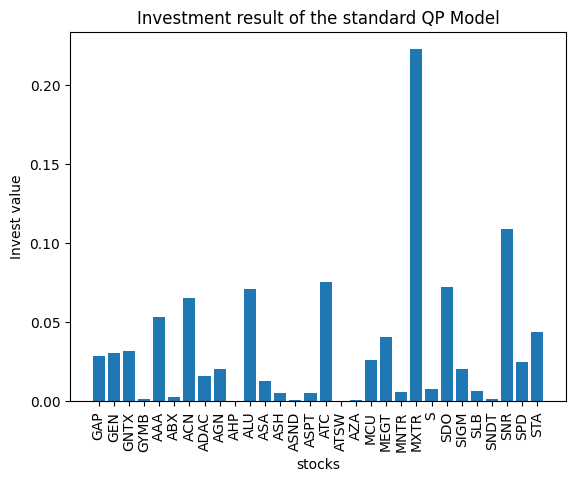

In [4]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
y_pos = np.arange(len(invest['stocks']))
plt.bar(y_pos, invest['level'], align='center', alpha=1)
plt.xticks(y_pos, invest['stocks'],rotation = 90)
plt.xlabel('stocks')
plt.ylabel('Invest value')
plt.title('Investment result of the standard QP Model')
plt.show()